In [1]:
import numpy as np

In [2]:
import keras
from keras import layers

In [3]:
encoding_dim=32

In [4]:
#Input image
input_img=keras.Input(shape=(784,))

In [5]:
#Encoded
encoded=layers.Dense(encoding_dim,activation="relu")(input_img)

In [6]:
#Decoded
decoded=layers.Dense(784,activation="sigmoid")(encoded)

In [7]:
autoencoder=keras.Model(input_img,decoded)

In [8]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Creo el encoder
encoder = keras.Model(input_img, encoded)

In [10]:
#Encoder input: 32
encoded_input = keras.Input(shape=(encoding_dim,))

In [11]:
#Recupero la última capa del autoencoder
decoder_layer = autoencoder.layers[-1]

In [12]:
#Creo el modelo decoder
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [13]:
decoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Preparo los datos de entrada
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
#Normalizo las imágenes
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [16]:
x_train=x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))

In [17]:
x_test=x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))

In [18]:
#Compile step para ajustar algunos config. del modelo antes de entrenar
autoencoder.compile(optimizer="adam",
                    loss="binary_crossentropy")

In [19]:
#Entrenando el autoencoder con 50 épocas
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test,x_test)
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.3836 - val_loss: 0.1868
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1781 - val_loss: 0.1534
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1492 - val_loss: 0.1338
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1320 - val_loss: 0.1217
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1208 - val_loss: 0.1133
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1132 - val_loss: 0.1075
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1077 - val_loss: 0.1031
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1036 - val_loss: 0.0996
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1003 - val_loss: 0.0972
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0980 - val_loss: 0.0955
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0966 - val_loss: 0.0945
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

----------------

In [21]:
import matplotlib.pyplot as plt

In [48]:
#Encoded images de la data de train
encoded_imgs_train=encoder.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [29]:
#Intento visualizar las imágenes reconstruidas y las representaciones codificadas
encoded_imgs=encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
decoded_imgs=decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


-------

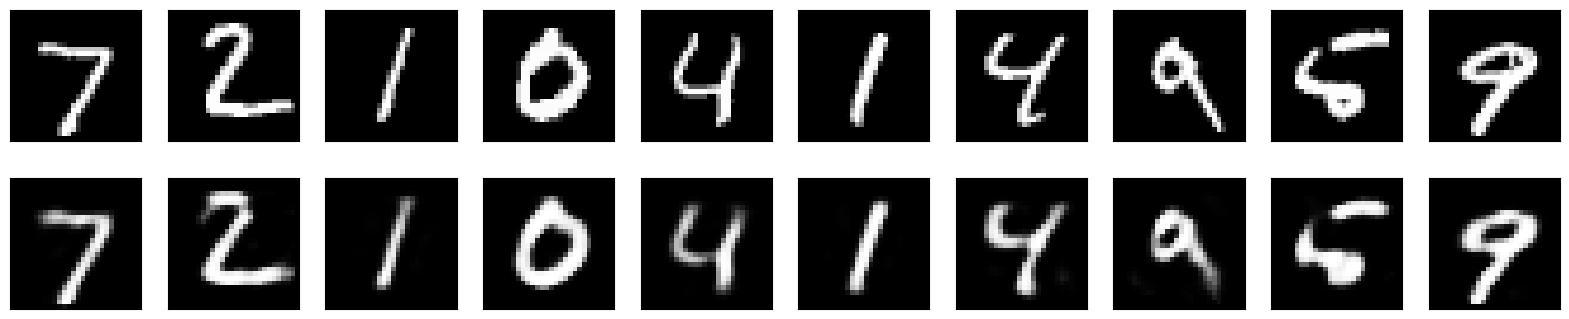

In [34]:
#Matplotlib
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #Display las imgs originales
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display las imgs reconstruidas
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

---

## Trataré de usar las features comprimidas por la capa intermedia del autoencoder para usarlas como input a un modelo de clasificación. Luego, haré las comparaciones, usando un modelo en los datos de 28x28; es decir, 784 features por imagen.

### Logistic Regression sin autoencoder features

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LR=LogisticRegression()

In [41]:
#Entreno el modelo
LR.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
lr_pred1=LR.predict(x_test)

### Logistic Regression con autoencoder features

In [46]:
LR2=LogisticRegression()

In [49]:
LR2.fit(encoded_imgs_train,y_train) #Aquí uso las encoded images comprimidas por la capa intermedia del autoencoder

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
lr_pred2=LR2.predict(encoded_imgs) #donde encoded_imgs son los valores con las features comprimidas (32 de dimensión para cada imagen)

----

## Ahora, pruebo el rendimiento:
¿Qué espero?
Espero que el tiempo de training sobre los datos en crudo sea mayor, ya que la dimensionalidad en los features de cada imagen tiene más número de representación.
Además, también creo que el rendimiento de los datos en crudo será mayor, pues los features no están comprimidos, por lo que habrá una mejor representación de los datos.
--> Para mí, el performance del modelo sin features comprimidos > el modelo con features comprimidos; además, el tiempo de training en los datos sin features comprimidos > en los datos con features comprimidos

# Datos en crudo:

In [64]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [59]:
acc1=accuracy_score(y_test,lr_pred1)

In [58]:
print(f"Accuracy: {acc1}")

Accuracy: 0.9256


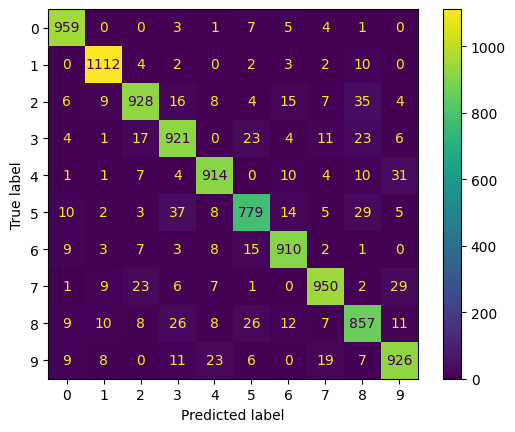

In [55]:
cm1=confusion_matrix(y_test,lr_pred1)
cmd1=ConfusionMatrixDisplay(cm1)
cmd1.plot()

# Datos con features comprimidas

In [60]:
acc2=accuracy_score(y_test,lr_pred2)

In [62]:
print(f"Accuracy: {acc2}")

Accuracy: 0.8987


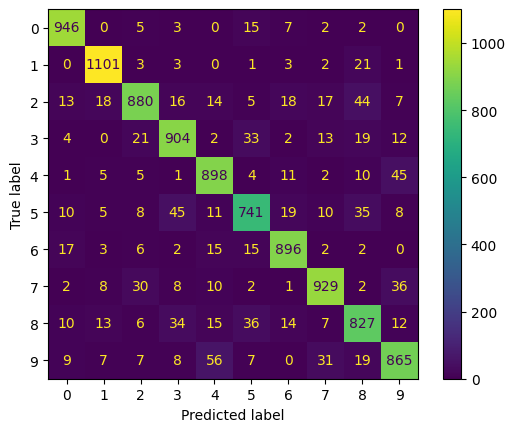

In [61]:
cm2=confusion_matrix(y_test,lr_pred2)
cmd2=ConfusionMatrixDisplay(cm2)
cmd2.plot()

# Resultados

## Accuracy:
### Sin autoencoder para reducción de características: 92.56%
### Con autoencoder para reducción de características: 89.87%